In [1]:
import numpy as np
import matplotlib as plt
from scipy.optimize import root
from planning_algorithms import *
from util import *

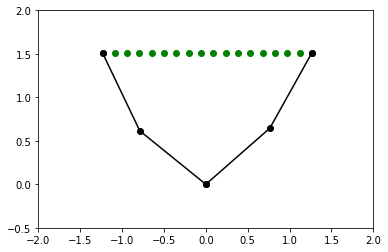

In [2]:
# define path to follow
# Np = 8
# xp = np.vstack((np.linspace(-1.5, 1.5, Np), np.ones(Np) * 1.0)).T

# calulate inital configuration
# q0_guess = np.array([np.pi / 2, np.pi / 4])
# x0 = xp[0, :]
# res = newton(x0, q0_guess)
# q0 = res['q']

# path from paper
Np = 18
xC0 = [1.266, 1.51]
xCf = [-1.234, 1.51]
xp = np.vstack((np.linspace(xC0[0], xCf[0], Np), np.ones(Np) * xC0[1])).T
q_guess = [40.0 / 180.0 * np.pi, 20.0 / 180.0 * np.pi]

# ik for first point
sol = root(lambda q : xp[0, :] - fk(q), q_guess)
q0 = sol['x']

# ik for last point, needed for taylors algorithm
sol = root(lambda q : xp[-1, :] - fk(q), q0)
qN = sol['x']

# plot initial configuration
plt.figure()
plt.axis([-2, 2, -0.5, 2])
plt.plot(xp[:, 0], xp[:, 1], 'go')
x2, x1 = fk(q0, all_links = True)
plt.plot([0, x1[0], x2[0]], [0, x1[1], x2[1]], 'ko-')
x2, x1 = fk(qN, all_links = True)
plt.plot([0, x1[0], x2[0]], [0, x1[1], x2[1]], 'ko-')
plt.show()

## Inverse kinematics for every path point

In [3]:
qp1 = exact_ik(xp, q0)
#print qp1

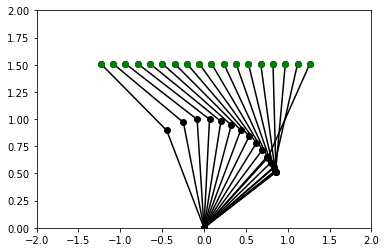

In [4]:
# plot planned motion
plt.figure()
plt.axis([-2, 2, 0.0, 2.0])

# plot solution configurations
for i in range(Np):
    x2, x1 = fk(qp1[i], all_links = True)
    plt.plot([0, x1[0], x2[0]], [0, x1[1], x2[1]], 'ko-')

# given path
plt.plot(xp[:, 0], xp[:, 1], 'go')
plt.show()

## Linear interpolation in join space (Taylor's algorithm)

In [5]:
print xp

[[ 1.266       1.51      ]
 [ 1.11894118  1.51      ]
 [ 0.97188235  1.51      ]
 [ 0.82482353  1.51      ]
 [ 0.67776471  1.51      ]
 [ 0.53070588  1.51      ]
 [ 0.38364706  1.51      ]
 [ 0.23658824  1.51      ]
 [ 0.08952941  1.51      ]
 [-0.05752941  1.51      ]
 [-0.20458824  1.51      ]
 [-0.35164706  1.51      ]
 [-0.49870588  1.51      ]
 [-0.64576471  1.51      ]
 [-0.79282353  1.51      ]
 [-0.93988235  1.51      ]
 [-1.08694118  1.51      ]
 [-1.234       1.51      ]]


In [6]:
# In this case we don't use the path, only the first and the last point
# We do need the ik solution for the last point (qN)
d = 0.1 # acceptable deviation from path
qp2, xp2 = taylor_interpolation(xp[0], xp[-1], q0, qN, d)
#print qp2

0
[array([ 1.266,  1.51 ]), array([-1.234,  1.51 ])]
0
[array([ 1.266,  1.51 ]), array([ 0.016,  1.51 ]), array([-1.234,  1.51 ])]
0
[array([ 1.266,  1.51 ]), array([ 0.641,  1.51 ]), array([ 0.016,  1.51 ]), array([-1.234,  1.51 ])]
2
[array([ 1.266,  1.51 ]), array([ 0.96602955,  1.57709007]), array([ 0.641,  1.51 ]), array([ 0.016,  1.51 ]), array([-1.234,  1.51 ])]
4
[array([ 1.266,  1.51 ]), array([ 0.96602955,  1.57709007]), array([ 0.641,  1.51 ]), array([ 0.32270058,  1.54411051]), array([ 0.016,  1.51 ]), array([-1.234,  1.51 ])]
4
[array([ 1.266,  1.51 ]), array([ 0.96602955,  1.57709007]), array([ 0.641,  1.51 ]), array([ 0.32270058,  1.54411051]), array([ 0.016,  1.51 ]), array([-0.609,  1.51 ]), array([-1.234,  1.51 ])]
6
[array([ 1.266,  1.51 ]), array([ 0.96602955,  1.57709007]), array([ 0.641,  1.51 ]), array([ 0.32270058,  1.54411051]), array([ 0.016,  1.51 ]), array([-0.29109792,  1.54371617]), array([-0.609,  1.51 ]), array([-1.234,  1.51 ])]
6
[array([ 1.266,  1.51 

[array([ 1.266,  1.51 ]), array([ 0.96602955,  1.57709007]), array([ 0.641,  1.51 ]), array([ 0.32270058,  1.54411051]), array([ 0.016,  1.51 ]), array([-0.29109792,  1.54371617]), array([-0.609,  1.51 ]), array([-0.76438146,  1.5211581 ]), array([-0.9215,  1.51  ]), array([-1.0002915 ,  1.51382067]), array([-1.07775,  1.51   ]), array([-1.117301  ,  1.51131407]), array([-1.155875,  1.51    ]), array([-1.17561955,  1.51043136]), array([-1.1949375,  1.51     ]), array([-1.20477709,  1.5101313 ]), array([-1.21446875,  1.51      ]), array([-1.21937386,  1.51003717]), array([-1.22423437,  1.51      ]), array([-1.22668196,  1.51000998]), array([-1.22911719,  1.51      ]), array([-1.23033952,  1.51000259]), array([-1.23155859,  1.51      ]), array([-1.23216936,  1.51000066]), array([-1.2327793,  1.51     ]), array([-1.23308458,  1.51000017]), array([-1.23338965,  1.51      ]), array([-1.23354226,  1.51000004]), array([-1.23369482,  1.51      ]), array([-1.23377112,  1.51000001]), array([-1.2

[array([ 1.266,  1.51 ]), array([ 0.96602955,  1.57709007]), array([ 0.641,  1.51 ]), array([ 0.32270058,  1.54411051]), array([ 0.016,  1.51 ]), array([-0.29109792,  1.54371617]), array([-0.609,  1.51 ]), array([-0.76438146,  1.5211581 ]), array([-0.9215,  1.51  ]), array([-1.0002915 ,  1.51382067]), array([-1.07775,  1.51   ]), array([-1.117301  ,  1.51131407]), array([-1.155875,  1.51    ]), array([-1.17561955,  1.51043136]), array([-1.1949375,  1.51     ]), array([-1.20477709,  1.5101313 ]), array([-1.21446875,  1.51      ]), array([-1.21937386,  1.51003717]), array([-1.22423437,  1.51      ]), array([-1.22668196,  1.51000998]), array([-1.22911719,  1.51      ]), array([-1.23033952,  1.51000259]), array([-1.23155859,  1.51      ]), array([-1.23216936,  1.51000066]), array([-1.2327793,  1.51     ]), array([-1.23308458,  1.51000017]), array([-1.23338965,  1.51      ]), array([-1.23354226,  1.51000004]), array([-1.23369482,  1.51      ]), array([-1.23377112,  1.51000001]), array([-1.2

ValueError: Line must be given by two different points, d= 5.68434188608e-13

In [7]:
# plot planned motion
plt.figure()
plt.axis([-2, 2, 0.0, 2.0])

# plot solution configurations
for i in range(len(qp2)):
    x2, x1 = fk(qp2[i], all_links = True)
    plt.plot([0, x1[0], x2[0]], [0, x1[1], x2[1]], 'ko-')

# given path
plt.plot(xp[:, 0], xp[:, 1], 'g--')

# allowed deviation
plt.plot(xp[:, 0], xp[:, 1] - d, 'r-.')
plt.plot(xp[:, 0], xp[:, 1] + d, 'r-.')
#plt.show()

NameError: name 'qp2' is not defined

## Local optimization of joint movement

In [ ]:
d = 0.1
qp3, xp3 = local_optimization(xp, q0, d)

In [ ]:
# plot planned motion
plt.figure()
plt.axis([-2, 2, 0.0, 2.0])

# plot solution configurations
for i in range(len(qp3)):
    x2, x1 = fk(qp3[i], all_links = True)
    plt.plot([0, x1[0], x2[0]], [0, x1[1], x2[1]], 'ko-')

# given path
plt.plot(xp[:, 0], xp[:, 1], 'g--')

# allowed deviation
plt.plot(xp[:, 0], xp[:, 1] - d, 'r-.')
plt.plot(xp[:, 0], xp[:, 1] + d, 'r-.')
plt.show()

## Local trajectory shortening in joint space

In [ ]:
qp4, xp4 = trajectory_shortening(xp, qp1, d, angle_max = 175.0 / 180.0 * np.pi)

In [ ]:
# plot planned motion
plt.figure()
plt.axis([-2, 2, 0.0, 2.0])

# plot solution configurations
for i in range(len(qp4)):
    x2, x1 = fk(qp4[i], all_links = True)
    plt.plot([0, x1[0], x2[0]], [0, x1[1], x2[1]], 'ko-')

# given path
plt.plot(xp[:, 0], xp[:, 1], 'g--')

# allowed deviation
plt.plot(xp[:, 0], xp[:, 1] - d, 'r-.')
plt.plot(xp[:, 0], xp[:, 1] + d, 'r-.')
plt.show()